In [ ]:
UNET 2

In [ ]:
#Basically copied from 
## https://github.com/shibuiwilliam/Keras_Autoencoder/blob/master/Cifar_Conv_AutoEncoder_UNET.ipynb

In [1]:
## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
            ####################
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers
###
import pickle as pkl
import time

Using TensorFlow backend.


In [2]:
# reading the data 
df_good = pd.read_pickle("shuffled_good_df-Copy1.pkl")
df_bad=  pd.read_pickle("shuffled_bad_df-Copy1.pkl")
#creating a short data frame
df_good_short= df_good.iloc[:1000,:]
df_bad_short= df_bad.iloc[:1000,:]
#creating the test train split
## making the pictures into numpy arrays, they are already shuffled so I can just split them as following. 
#Also the test-train split will screw up the correspondance between the noisy and the non noisy images having the same signal. 
x_train_bad = df_bad.iloc[:1840,:].values
x_test_bad = df_bad.iloc[1840:,:].values
x_train_good = df_good.iloc[:1840,:].values
x_test_good = df_good.iloc[1840:,:].values

In [3]:
#max_bad=  np.amax(x_train_bad)
max_good=  np.amax(x_train_good)
min_bad=  np.amin(x_train_bad)
#min_good=  np.amin(x_train_good)
scaling_factor = max_good - min_bad
#scale_gd = (max_good - min_good)
#scale_bd = (max_bad - min_bad)

In [4]:
x_train_bad = x_train_bad.astype('float32') / scaling_factor
x_test_bad = x_test_bad.astype('float32') / scaling_factor
x_train_good = x_train_good.astype('float32') / scaling_factor
x_test_good = x_test_good.astype('float32') / scaling_factor

In [6]:
print('the maximum of good is ', max_good)
print('the min of bad is ', min_bad)
print('the scaling factor is' , scaling_factor)


the maximum of good is  3020
the min of bad is  0
the scaling factor is 3020


In [7]:
#max_bad=  np.amax(x_train_bad)
max_good_new=  np.amax(x_train_good)
min_bad_new=  np.amin(x_train_bad)
#min_good=  np.amin(x_train_good)
#scaling_factor = max_good - min_bad


the maximum of good is  3020
the min of bad is  0


In [8]:
print('the maximum of good is ', max_good_new)
print('the min of bad is ', min_bad_new)

the maximum of good is  1.0
the min of bad is  0.0


In [12]:
#cropping 
print('working on the test set')
gd_test_cropped= []
bd_test_cropped= []
for y in range(len(x_test_bad)): 
    
    r= random.randint(425, 775)
    #print('random number is '+str(r))
    x_gd= x_test_good[y].reshape(1200, 1200)  #reshaping it into a square image
    #print(x.shape)

#I want the middle square 32 X 32 of the picture. 
    x_gd_cropped=x_gd[r-16:r+16, r-16:r+16] #picking up the center small square of the size 28 X 28
    #print(x_cropped.shape)
    x_gd_cropped_numpy = x_gd_cropped.reshape(1,32*32)    #reshaping it to be a row
    x_gd_cropped_numpy= x_gd_cropped_numpy.ravel()        #furture modification of the shape
    #print(x_cropped_numpy.shape)
    gd_test_cropped.append(x_gd_cropped_numpy)        #appending this sample to the list

    x_bd= x_test_bad[y].reshape(1200, 1200)  #reshaping it into a square image
    #print(x.shape)

#I want the middle square 32 X 32 of the picture. 
    x_bd_cropped=x_bd[r-16:r+16, r-16:r+16] #picking up the center small square of the size 28 X 28
    #print(x_cropped.shape)
    x_bd_cropped_numpy = x_bd_cropped.reshape(1,32*32)     #reshaping it to be a row
    x_bd_cropped_numpy= x_bd_cropped_numpy.ravel()        #furture modification of the shape
    #print(x_cropped_numpy.shape)
    bd_test_cropped.append(x_bd_cropped_numpy)        #appending this sample to the list



gd_test_cropped=np.asarray(gd_test_cropped)    #changing its type so that it is a numpy array 
    
bd_test_cropped=np.asarray(bd_test_cropped)        #changing its type so that it is a numpy array 


print('working on the train set')
gd_train_cropped= []
bd_train_cropped= []
for y in range(len(x_train_bad)): 
    
    r= random.randint(425, 775)
    #print('random number is '+str(r))
    x_gd= x_train_good[y].reshape(1200, 1200)  #reshaping it into a square image
    #print(x.shape)

#I want the middle square 32 X 32 of the picture. 
    x_gd_cropped=x_gd[r-16:r+16, r-16:r+16] #picking up the center small square of the size 50 X 50
    #print(x_cropped.shape)
    x_gd_cropped_numpy = x_gd_cropped.reshape(1,32*32)    #reshaping it to be a row
    x_gd_cropped_numpy= x_gd_cropped_numpy.ravel()        #furture modification of the shape
    #print(x_cropped_numpy.shape)
    gd_train_cropped.append(x_gd_cropped_numpy)        #appending this sample to the list

    x_bd= x_train_bad[y].reshape(1200, 1200)  #reshaping it into a square image
    #print(x.shape)

#I want the middle square 28 X 28 of the picture. 
    x_bd_cropped=x_bd[r-16:r+16, r-16:r+16] #picking up the center small square of the size 28 X 28
    #print(x_cropped.shape)
    x_bd_cropped_numpy = x_bd_cropped.reshape(1,32*32)     #reshaping it to be a row
    x_bd_cropped_numpy= x_bd_cropped_numpy.ravel()        #furture modification of the shape
    #print(x_cropped_numpy.shape)
    bd_train_cropped.append(x_bd_cropped_numpy)        #appending this sample to the list



gd_train_cropped=np.asarray(gd_train_cropped)    #changing its type so that it is a numpy array 
    
bd_train_cropped=np.asarray(bd_train_cropped)        #changing its type so that it is a numpy array 



working on the test set
working on the train set


In [13]:
print('length of bad test set is  '+ str(len(bd_test_cropped)))

length of bad test set is  460


In [14]:
print('length of bad train set is  '+ str(len(bd_train_cropped)))

length of bad train set is  1840


In [15]:
gd_train_cropped.shape

(1840, 1024)

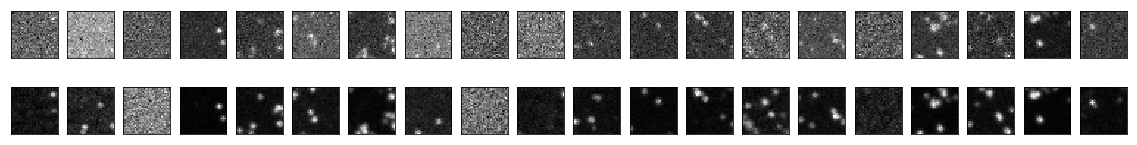

In [16]:
#decoded_imgs = autoencoder.predict(bd_test)
#print("decoded_imgs.shape",decoded_imgs.shape)

import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(bd_test_cropped[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(gd_test_cropped[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
  #  ax = plt.subplot(3, n, i + 1 + 2*n)
  #  plt.imshow(gd_test_cropped[i].reshape(32, 32))
  #  plt.gray()
  #  ax.get_xaxis().set_visible(False)
  #  ax.get_yaxis().set_visible(False)
plt.show()

#fig.savefig('patience_PredVsGT')

Ok, sweet, coorespondance is maintained. 

In [17]:
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation 
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0,
                             #should be 0
                             rotation_range=0, #rotating images by 90 degrees 
                             width_shift_range=0.0, 
                             height_shift_range=0.0, 
                             brightness_range=None, 
                             shear_range=0.0, 
                             zoom_range=0.0, 
                             channel_shift_range=0.0, 
                             fill_mode='nearest', 
                             cval=0.0, 
                             horizontal_flip=True, # flipping the image horizontally
                             vertical_flip=True,   #flipping the image vertically
                             rescale=None, 
                             preprocessing_function=None, 
                             data_format=None, validation_split=0.0, dtype=None)


In [18]:
#reshaping for data gen
gd_test_cropped=gd_test_cropped.reshape(gd_test_cropped.shape[0],32,32,1)

bd_test_cropped=bd_test_cropped.reshape(bd_test_cropped.shape[0],32,32,1)

gd_train_cropped=gd_train_cropped.reshape(gd_train_cropped.shape[0],32,32,1)

bd_train_cropped=bd_train_cropped.reshape(bd_train_cropped.shape[0],32,32,1)


print(gd_test_cropped.shape)
print(bd_test_cropped.shape)
print(gd_train_cropped.shape)
print(bd_train_cropped.shape)

(460, 32, 32, 1)
(460, 32, 32, 1)
(1840, 32, 32, 1)
(1840, 32, 32, 1)


In [19]:
## generating the train set 
start= time.time()
## reshaping the timages for image generation
x= bd_train_cropped
print(x.shape)
y= gd_train_cropped
print(y.shape)
batch_size=15000
train_bad_gen=[]
i=0
for img_batch in datagen.flow(x, batch_size=batch_size, seed=42):
   
    for img in img_batch:
      
        im2=img.reshape(32,32)
        train_bad_gen.append(im2)

        i=i+1    
    if i >= batch_size:
        break
        
train_bad_gen = np.asarray(train_bad_gen)


print('finished generating train bad images')


train_good_gen=[]
i=0
for img_batch in datagen.flow(y, batch_size=batch_size, seed=42):
    #print(len(img_batch)
    for img in img_batch:
        #print(img.shape)
        im2=img.reshape(32,32)
        #print(im2.shape)
        train_good_gen.append(im2)
        #print(len(newarr))
        #plt.subplot(530 + 1 + i)  #### row number column number and fig number
        #plt.imshow(img.reshape(28,28))
        #plt.show()
        #print('')
        i=i+1    
    if i >= batch_size:
        break
        
train_good_gen = np.asarray(train_good_gen)


print('finished generating train good images')


end=time.time()

print('time it took' , end-start, "seconds")

(1840, 32, 32, 1)
(1840, 32, 32, 1)
finished generating train bad images
finished generating train good images
time it took 0.3551976680755615 seconds


In [20]:
print(train_good_gen.shape)

(16560, 32, 32)


In [21]:
print(train_bad_gen.shape)

(16560, 32, 32)


In [22]:
## generating the train set 
start= time.time()
## reshaping the timages for image generation
x= bd_test_cropped
print(x.shape)
y= gd_test_cropped
print(y.shape)
batch_size=3132
test_bad_gen=[]
i=0
for img_batch in datagen.flow(x, batch_size=batch_size, seed=6):
   
    for img in img_batch:
      
        im2=img.reshape(32,32)
        test_bad_gen.append(im2)

        i=i+1    
    if i >= batch_size:
        break
        
test_bad_gen = np.asarray(test_bad_gen)


print('finished generating train bad images')


test_good_gen=[]
i=0
for img_batch in datagen.flow(y, batch_size=batch_size, seed=6):
    #print(len(img_batch)
    for img in img_batch:
        #print(img.shape)
        im2=img.reshape(32,32)
        #print(im2.shape)
        test_good_gen.append(im2)
        #print(len(newarr))
        #plt.subplot(530 + 1 + i)  #### row number column number and fig number
        #plt.imshow(img.reshape(28,28))
        #plt.show()
        #print('')
        i=i+1    
    if i >= batch_size:
        break
        
test_good_gen = np.asarray(test_good_gen)


print('finished generating train good images')


end=time.time()

print('time it took' , end-start, "seconds")

(460, 32, 32, 1)
(460, 32, 32, 1)
finished generating train bad images
finished generating train good images
time it took 0.06907105445861816 seconds


In [23]:
print(test_good_gen.shape)

(3220, 32, 32)


In [24]:
test_bad_gen.shape

(3220, 32, 32)

In [25]:
#reshape them both to be (number of samples, 32, 32, 1)
# concentration of training and testing together 
#the generated --? test_good_gen
#the original      bd_test_cropped
test_good_gen = test_good_gen.reshape(test_good_gen.shape[0],32,32,1)
test_bad_gen = test_bad_gen.reshape(test_bad_gen.shape[0],32,32,1)
train_good_gen= train_good_gen.reshape(train_good_gen.shape[0],32,32,1)
train_bad_gen = train_bad_gen.reshape(train_bad_gen.shape[0],32,32,1)
#bd_test_cropped = bd_test_cropped(bd_test_cropped.shape[0],32,32,1)
#gd_test_cropped = gd_test_cropped(gd_test_cropped.shape[0],32,32,1)
#bd_train_cropped = bd_train_cropped(bd_train_cropped.shape[0],32,32,1)
#gd_train_cropped = gd_train_cropped(gd_train_cropped.shape[0],32,32,1)



In [26]:
y_test_32 = np.concatenate((test_good_gen, gd_test_cropped), axis=0)

In [28]:
y_test_32.shape

(3680, 32, 32, 1)

In [29]:
y_train_32 = np.concatenate((train_good_gen, gd_train_cropped), axis=0)
x_train_32 = np.concatenate((train_bad_gen, bd_train_cropped), axis=0)
x_test_32 = np.concatenate((test_bad_gen, bd_test_cropped), axis=0)

In [30]:
###### Save the arrays 
np.save('gd_train_32_32_1.npy', y_train_32, allow_pickle= True)

In [31]:
np.save('gd_test_32_32_1.npy', y_test_32, allow_pickle= True)
np.save('bd_test_32_32_1.npy', x_test_32, allow_pickle= True)
np.save('bd_train_32_32_1.npy', x_train_32, allow_pickle = True)

In [32]:
####### printing shapes just to make sure
print('shape of good training', y_train_32.shape)
print('shape of bad training, ', x_train_32.shape)
print('shape of good testing ', y_test_32.shape)
print('shape of bad testing ', x_test_32.shape)

shape of good training (18400, 32, 32, 1)
shape of bad training,  (18400, 32, 32, 1)
shape of good testing  (3680, 32, 32, 1)
shape of bad testing  (3680, 32, 32, 1)


In [10]:
## loading data 
x_test = np.load('bd_test_32_32_1.npy')
y_test = np.load('gd_test_32_32_1.npy')
x_train= np.load('bd_train_32_32_1.npy')
y_train= np.load('gd_train_32_32_1.npy')

In [11]:
####### printing shapes just to make sure
print('shape of good training', y_train.shape)
print('shape of bad training, ', x_train.shape)
print('shape of good testing ', y_test.shape)
print('shape of bad testing ', x_test.shape)

shape of good training (18400, 32, 32, 1)
shape of bad training,  (18400, 32, 32, 1)
shape of good testing  (3680, 32, 32, 1)
shape of bad testing  (3680, 32, 32, 1)


In [33]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [34]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K

import os
import pickle
import numpy as np
#import cv2

In [ ]:
#not going to use that now, do not run next two cells



In [39]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [40]:
K.flatten(gd_train_cropped).shape

TensorShape([Dimension(1884160)])

In [36]:
inputs = Input((32, 32, 1))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

In [37]:
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
#removed the activatio = 'sigmoid from the last layer'
conv10 = Conv2D(1, (3, 3), padding='same')(conv9)

In [38]:
#In the project I used 
# 
#
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['mse'])
model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['mse'])

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 32)   9248        conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [ ]:
#don't run next three blocks

In [24]:
# load pretrained weights
#model.load_weights(os.path.join(saveDir,"AutoEncoder_UNET_weights.00--0.71--0.72.hdf5"))

In [40]:
batch_size = 128
#num_classes = 10
epochs = 100


In [ ]:
#fitting

In [41]:
#####
#Here I try monitoring the mse and minimizing that 
start=time.time()
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.save_weights('model_init.h5')
callbacks = [EarlyStopping(monitor='val_mean_squared_error', patience=10),
             ModelCheckpoint(filepath='best_model_600.h5', monitor='val_mean_squared_error', save_best_only=True)]

model.load_weights('model_init.h5')
history = model.fit(x_train_32,y_train_32,
                              epochs=100,
                              batch_size=128,
                              verbose=1, # set to 0 for no printout while running
                              callbacks=callbacks, # Early stopping
                              validation_data=(x_test_32,y_test_32))

end=time.time()

print('fitting took ', (start-end)/60, 'minutes to run')

Train on 18400 samples, validate on 3680 samples
Epoch 1/100
18400/18400 [==============================] - 66s 4ms/step - loss: 0.1857 - mean_squared_error: 5.1363e-04 - val_loss: 0.1810 - val_mean_squared_error: 4.7138e-04
Epoch 2/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1812 - mean_squared_error: 4.6543e-04 - val_loss: 0.1812 - val_mean_squared_error: 4.8641e-04
Epoch 3/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1811 - mean_squared_error: 4.6082e-04 - val_loss: 0.1809 - val_mean_squared_error: 4.6693e-04
Epoch 4/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1811 - mean_squared_error: 4.5862e-04 - val_loss: 0.1809 - val_mean_squared_error: 4.6137e-04
Epoch 5/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1811 - mean_squared_error: 4.5806e-04 - val_loss: 0.1808 - val_mean_squared_error: 4.5450e-04
Epoch 6/100
18400/18400 [==============================] - 65s 4ms/step

18400/18400 [==============================] - 65s 4ms/step - loss: 0.1783 - mean_squared_error: 6.7663e-05 - val_loss: 0.1779 - val_mean_squared_error: 5.3122e-05
Epoch 48/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1783 - mean_squared_error: 6.8429e-05 - val_loss: 0.1787 - val_mean_squared_error: 1.6228e-04
Epoch 49/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1783 - mean_squared_error: 6.8178e-05 - val_loss: 0.1780 - val_mean_squared_error: 6.7401e-05
Epoch 50/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1783 - mean_squared_error: 6.7559e-05 - val_loss: 0.1779 - val_mean_squared_error: 5.0638e-05
Epoch 51/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1783 - mean_squared_error: 6.7322e-05 - val_loss: 0.1790 - val_mean_squared_error: 2.1470e-04
Epoch 52/100
18400/18400 [==============================] - 65s 4ms/step - loss: 0.1782 - mean_squared_error: 6.2434e-05 - val_l

In [42]:
#save model
model.save('unet32_1.h5')  # "tag" the file with the number of dimensions

In [43]:
pred = model.predict(x_test_32)
print(pred.shape)

(3680, 32, 32, 1)


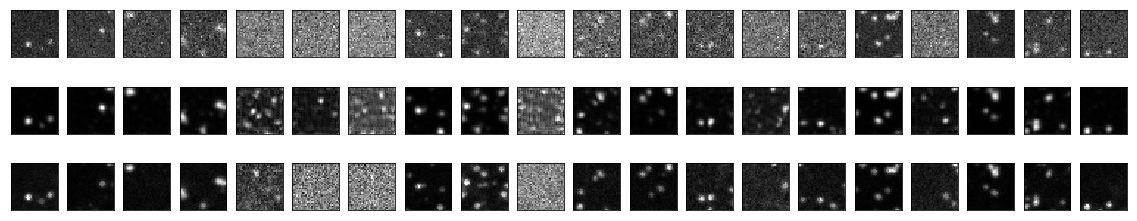

In [44]:
#decoded_imgs = autoencoder.predict(bd_test)
#print("decoded_imgs.shape",decoded_imgs.shape)

import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_32[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(pred[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(y_test_32[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#fig.savefig('patience_PredVsGT')

In [ ]:
#First row is bad "Low signal to noise images"
#second row is predicted
# third row is ground truth